<a href="https://colab.research.google.com/github/egisahril/Latihan_Machine_learning/blob/main/Latihan_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')

In [8]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [ ]:
# Mengubah nama kolom standar dan mengubah column gender menjadi kategorik

In [9]:
df = df.rename(columns={'Gender':'gender', 'Age':'age', 'Annual Income (k$)': 'annual income',
                        'Spending Score (1-100)': 'spending score'
                        })

In [11]:
# Ubah data kategorik menjadi data numerik
df['gender'].replace(['Female', 'Male'], [0, 1], inplace= True)

In [30]:
df.head(3)

,CustomerID,gender,age,annual income,spending score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [24]:
from sklearn.cluster import KMeans

# Menghilangkan column customer dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)

# Membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)


#membuat list yang berisi inertia
# clusters = []
# for i in range(1,11):
#   km = KMeans(n_clusters=i).fit(X)
#   clusters.append(km.inertia_)

In [38]:
clusters

[308812.78,
 212840.16982097185,
 143342.751571706,
 104366.15145556198,
 75350.77917248776,
 58302.40630860368,
 51082.54296792137,
 44637.39564017064,
 40567.962964123995,
 37570.878405516894]

Text(0, 0.5, 'inertia')

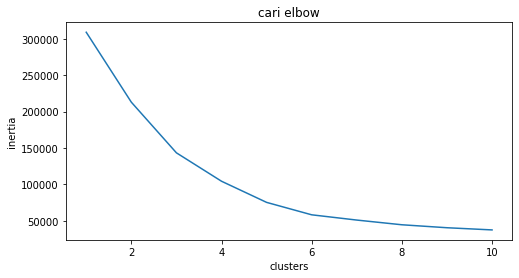

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Membuat plot Inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('cari elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


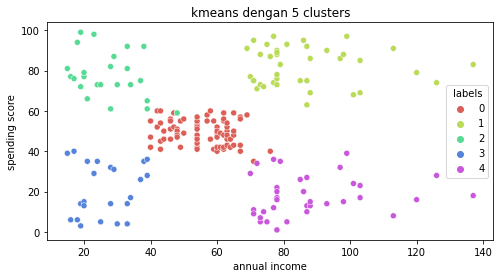

In [34]:
# Membuat Object KMeans
km5 = KMeans(n_clusters=5).fit(X)

# Menambahkan labels
X['labels'] = km5.labels_

# Membuat plot kmeans dengan 5 clusters
plt.figure(figsize=(8, 4))
sns.scatterplot(X['annual income'], X['spending score'], hue=X['labels'],
                palette= sns.color_palette('hls', 5))

plt.title('kmeans dengan 5 clusters')
plt.show()